## LQTMOMENT Tutorial 4: Data Analysis with LqtAnalysis

> **ℹ️ INFO ℹ️**
> 
> Before using `lqt_analysis` module, you need to prepare your `lqtmoment-formatted catalog`, as demonstrated in `lqt_tutor_1`. The new data field, `magnitude`, will automatically be included in the catalog after running the program for magnitude calculation. You can then work with this field in `LqtAnalysis` class. However, `LqtAnalysis` can still parse the `lqtmoment-formatted catalog` even if you haven't calculated the moment magnitude first.
> 
>

### 1. Import all the necessary modules from the **lqt_analysis** module.

In [1]:
from lqtmoment.lqt_analysis import load_catalog, LqtAnalysis, Statistic
import pandas as pd

> **ℹ️ INFO ℹ️**
> 
> From `lqt_analysis`, we need to import `load_catalog` module to load the `lqtmoment-formatted catalog` in `.csv` or `.xlsx` file type (`.csv` is preferred). This module will return an `LqtAnalysis` class object. The `LqtAnalysis` class can then parse the `lqtmoment-formatted` pandas DataFrame if you prefer to streamline your data in a DataFrame object. Finally, the `Statistic` class object, which is a helper class used to specify the statistical analysis you want `LqtAnalysis` to perform.
> 
>

### 2. Create LqtAnalysis Class Object

#### A. From A lqtmoment Catalog File (.csv or .xlsx)

To create `LqtAnalysis` class object from a file, first you need to prepare the directory of that file and use `load_catalog` to load the file and it will return the `LqtAnalysis` class object.

In [2]:
# Get the lqt catalog directory
catalog_dir = r"C:\Users\arham zakki edelo\lqt-tutorials\lqt-tutorials\run lqt moment\result_test.csv"

# Load the catalog
lqt_ready = load_catalog(catalog_dir)

# Check first 5 rows using head method
lqt_ready.head()

,Unnamed: 0,source_id,source_lat,source_lon,source_depth_m,magnitude,network_code,station_code,station_lat,station_lon,...,s_p_lag_time_sec,coda_time,source_err_rms_s,n_phases,gap_degree,x_horizontal_err_m,y_horizontal_err_m,z_depth_err_m,earthquake_type,remarks
0,0,2000,-4.244364,103.369385,-873.30,0.431429,RD,RD09,-4.224820,103.364433,...,0.537087,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
1,1,2000,-4.244364,103.369385,-873.30,0.431429,RD,RD06,-4.212581,103.379951,...,0.819840,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
2,2,2000,-4.244364,103.369385,-873.30,0.431429,RD,RD05,-4.203970,103.378906,...,0.994110,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
3,3,2001,-4.201387,103.357560,1258.86,1.060108,RD,RD05,-4.203970,103.378906,...,0.751148,NaN,0.055488,12.0,282.688,454.228142,469.387846,548.388115,very_local_earthquake,NaN
4,4,2001,-4.201387,103.357560,1258.86,1.060108,RD,RD06,-4.212581,103.379951,...,0.762638,NaN,0.055488,12.0,282.688,454.228142,469.387846,548.388115,very_local_earthquake,NaN


#### B. From A Catalog DataFrame

Let's say that after using `magnitude_estimator` API, as we have demonstrated in `lqt_tutor_3_moment_mag_calculation`, you want to use the `merged` catalog as the result of your moment magnitude calculation for immediate data analysis. In that case,  you can directly create `LqtAnalyais` class object like this:

In [3]:
# Let's pretend this catalog_df is the merged catalog resulting from magnitude_estimator module
catalog_df = pd.read_csv(catalog_dir)

# Then we can create LqtAnalysis class instance object with.
lqt_ready_2 = LqtAnalysis(catalog_df)

# Check first 5 rows using head method
lqt_ready_2.head(5)

,Unnamed: 0,source_id,source_lat,source_lon,source_depth_m,magnitude,network_code,station_code,station_lat,station_lon,...,s_p_lag_time_sec,coda_time,source_err_rms_s,n_phases,gap_degree,x_horizontal_err_m,y_horizontal_err_m,z_depth_err_m,earthquake_type,remarks
0,0,2000,-4.244364,103.369385,-873.30,0.431429,RD,RD09,-4.224820,103.364433,...,0.537087,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
1,1,2000,-4.244364,103.369385,-873.30,0.431429,RD,RD06,-4.212581,103.379951,...,0.819840,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
2,2,2000,-4.244364,103.369385,-873.30,0.431429,RD,RD05,-4.203970,103.378906,...,0.994110,NaN,0.010497,6.0,321.498,1001.074098,553.533887,1125.534873,very_local_earthquake,NaN
3,3,2001,-4.201387,103.357560,1258.86,1.060108,RD,RD05,-4.203970,103.378906,...,0.751148,NaN,0.055488,12.0,282.688,454.228142,469.387846,548.388115,very_local_earthquake,NaN
4,4,2001,-4.201387,103.357560,1258.86,1.060108,RD,RD06,-4.212581,103.379951,...,0.762638,NaN,0.055488,12.0,282.688,454.228142,469.387846,548.388115,very_local_earthquake,NaN


### 3. Perform Some Statistics

Using the `LqtAnalysis` class instance object, you can perform various statistical analyses to help evaluate your data. You can calculate statistics for any column in your catalog, and we provide the following list of available statistical methods:

- **MEAN**
- **MEDIAN**
- **STD**
- **MIN**
- **MAX**
- **DESCRIBE**

In [4]:
# Let's do some basic statistic here

mean_magnitude = lqt_ready_2.compute_statistic('magnitude', Statistic.MEAN)
print(f"The mean of magnitude is {mean_magnitude}")

max_magnitude = lqt_ready_2.compute_statistic('magnitude', Statistic.MAX)
print(f"The maximum value of magnitude is {max_magnitude}")

# Or you can also use DESCRIBE
describe = lqt_ready_2.compute_statistic('magnitude', Statistic.DESCRIBE)
print(f"Here the statistical description of the data: \n{describe}")

The mean of magnitude is 0.6425889431226027
The maximum value of magnitude is 2.171243526133633
Here the statistical description of the data: 
count    766.000000
mean       0.642589
std        0.378217
min       -0.183738
25%        0.386897
50%        0.605232
75%        0.867390
max        2.171244
Name: magnitude, dtype: float64


### 4. Plotting Histogram

Using the `LqtAnalysis` class instance object, you can also plot the histogram for any given numerical columns:

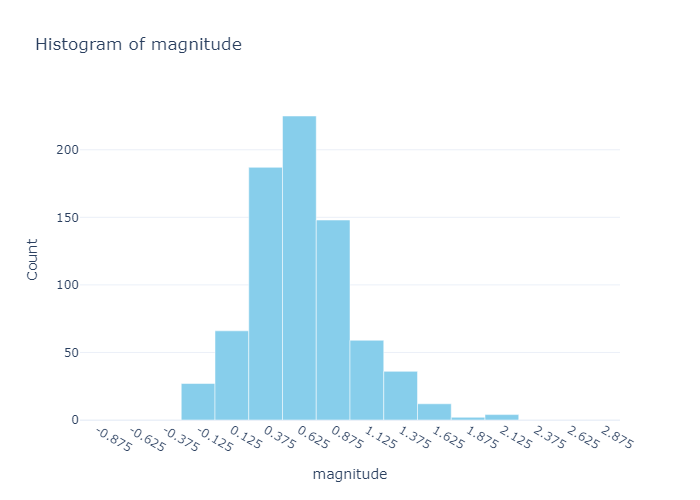

In [ ]:
# setting plotly for static render (delete this import and the render setting in your own scripts to experience plotly interactive, this is just for github deployment in this tutorial)
import plotly.io as pio
pio.renderers.default = 'png'  # or 'svg'


# Example of using plot_histogram method
lqt_ready_2.plot_histogram('magnitude', bin_width=0.25, min_bin=-1.0, max_bin=3.0)

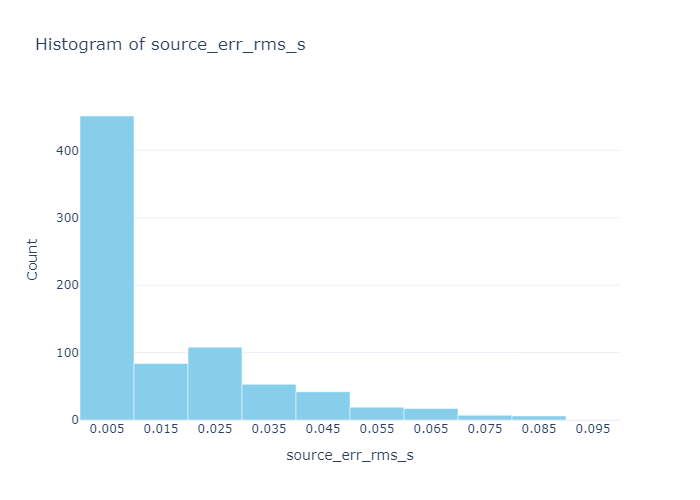

In [6]:
# Another example using different columns
lqt_ready_2.plot_histogram('source_err_rms_s', 0.01, max_bin=0.1)